##  Vision-and-Language Transformer (ViLT), fine-tuned on VQAv2 

Proposed in ViLT: Vision-and-Language Transformer Without Convolution or Region Supervision by Wonjae Kim, Bokyung Son, Ildoo Kim. 
https://huggingface.co/docs/transformers/master/en/model_doc/vilt#transformers.ViltForVisualQuestionAnswering

In [3]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import requests
from PIL import Image

import matplotlib.pyplot as plt

In [4]:
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

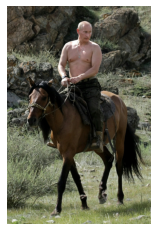

In [38]:
# prepare image + question
#url = "http://images.cocodataset.org/val2017/000000039769.jpg"
url = "https://static01.nyt.com/images/2014/06/16/world/17iht-letter17/17iht-letter17-superJumbo.jpg"
image = Image.open(requests.get(url, stream=True).raw)

plt.figure(figsize=(6,4))
plt.imshow(image)
plt.axis('Off')
plt.show()

In [47]:
question = "What is the color of the horse?"

# prepare inputs
encoding = processor(image, question, return_tensors="pt")

In [48]:
# forward pass
outputs = model(**encoding)
logits = outputs.logits
idx = logits.argmax(-1).item()
print("Predicted answer:", model.config.id2label[idx])

Predicted answer: brown


## VisualBERT

https://huggingface.co/docs/transformers/master/en/model_doc/visual_bert#transformers.VisualBertForPreTraining

Demo notebook: https://github.com/huggingface/transformers/blob/master/examples/research_projects/visual_bert/demo.ipynb

## LXMERT: Learning Cross-Modality Encoder Representations from Transformers

https://huggingface.co/docs/transformers/master/en/model_doc/lxmert